# CNN Custom Framework vs PyTorch — Visualization Notebook

This notebook:
- Runs comparable experiments in our NumPy-based CNN framework and PyTorch
- Logs training dynamics (loss, accuracy, gradient norms, time, memory)
- Generates plots for:
  - Custom vs PyTorch (same optimizer)
  - SGD vs Adam (2x2 optimizer grid)
  - Detailed diagnostics for selected runs

In [1]:
from pathlib import Path
from helper import ExperimentConfig, run_pair, run_optimizer_grid, visualize_pair, visualize_optimizer_grid, visualize_diagnostics
import visuals

LOG_DIR = Path("./logs")

## 1. Training and Logging

In [2]:
# === Baseline pair: Custom vs Torch, Adam ===

base_cfg = ExperimentConfig(
    optimizer_type="Adam",
    num_epochs=5,
    batch_size=64,
    lr=1e-3,
    model_out_channels=8,
    model_kernel_size=3,
    model_hidden_dim=128,
    log_name="k3_c8_h128_Adam_lr0.001",
    log_path=str(LOG_DIR),
)

custom_log_adam, torch_log_adam = run_pair(base_cfg)
print("Custom Adam log:", custom_log_adam)
print("Torch   Adam log:", torch_log_adam)

>>> Running Custom framework with Adam ...
[INFO] Training Start | Optimizer: Adam | Epochs: 5
[INFO] Training log saved to: logs/CNN_k3_c8_h128_Adam_lr0.001_k3_c8_h128_Adam_lr0.001_20251212_165612.json
Custom log saved at: logs/CNN_k3_c8_h128_Adam_lr0.001_k3_c8_h128_Adam_lr0.001_20251212_165612.json
>>> Running PyTorch baseline with Adam ...
[INFO-TORCH] Training Start | Opt: Adam | Device: cpu
Training log saved to: logs/TorchCNN_k3_c8_h128_Adam_lr0.001_k3_c8_h128_Adam_lr0.001_20251212_165830.json
Torch log saved at: logs/TorchCNN_k3_c8_h128_Adam_lr0.001_k3_c8_h128_Adam_lr0.001_20251212_165830.json
Custom Adam log: logs/CNN_k3_c8_h128_Adam_lr0.001_k3_c8_h128_Adam_lr0.001_20251212_165612.json
Torch   Adam log: logs/TorchCNN_k3_c8_h128_Adam_lr0.001_k3_c8_h128_Adam_lr0.001_20251212_165830.json


## 2. Baseline Comparison: Custom vs PyTorch


📊 Custom vs PyTorch: Convergence & Generalization


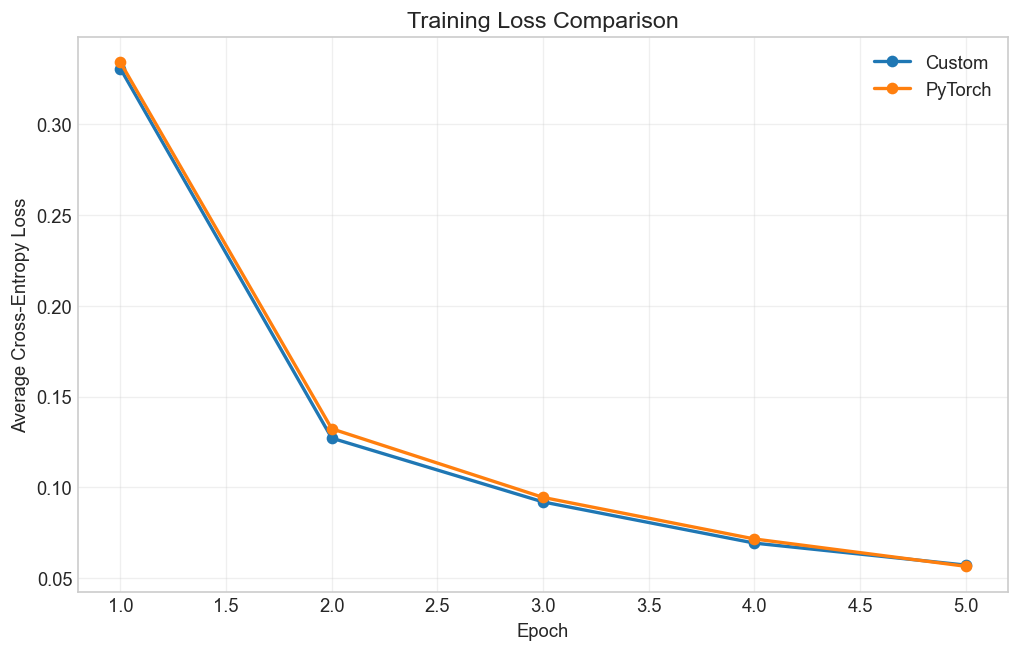

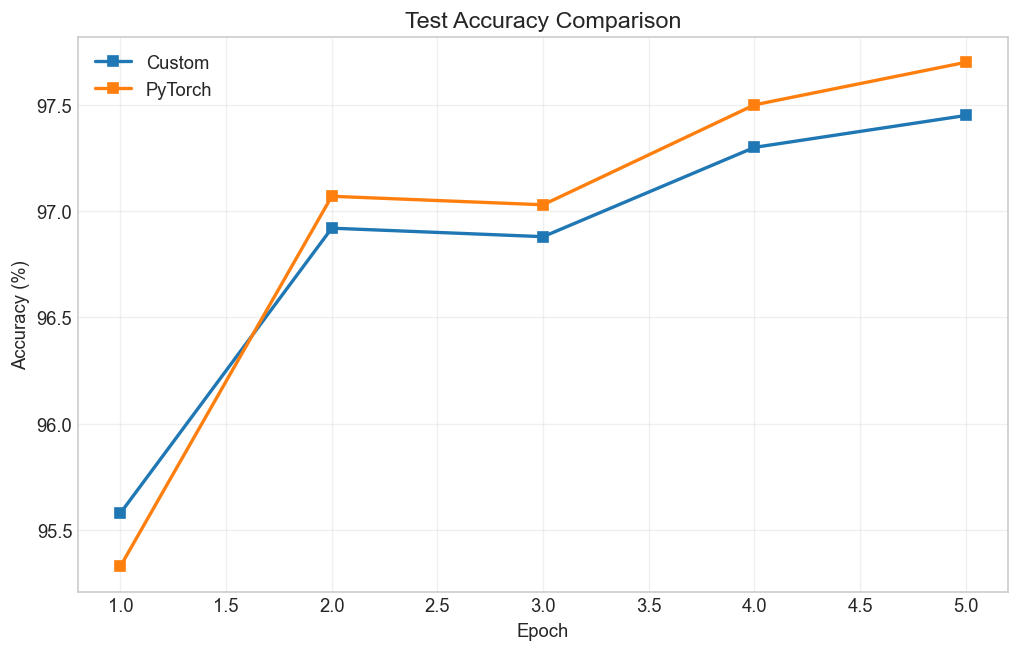


📉 Training Stability: Gradient Norms


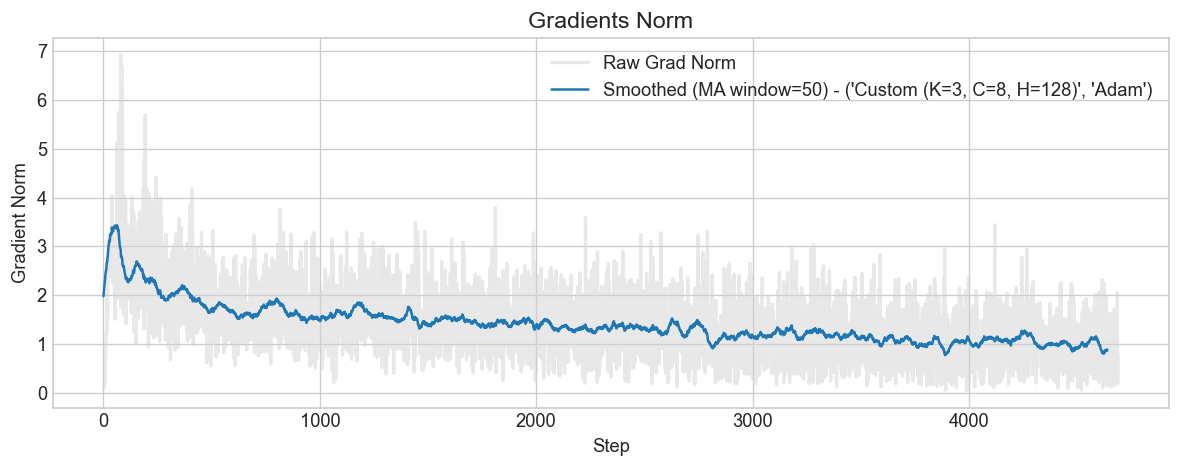

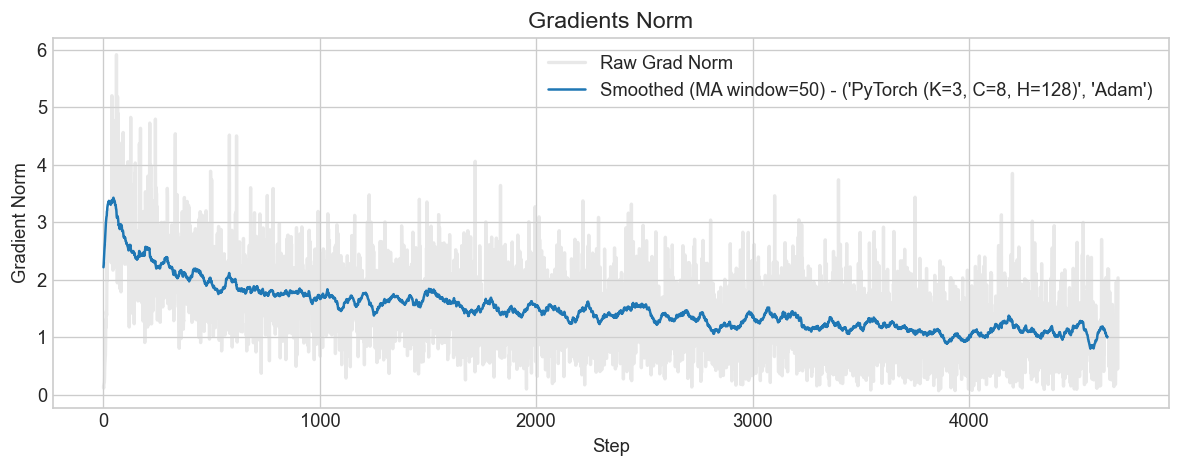


⏱️ Efficiency Frontier: Time vs Memory


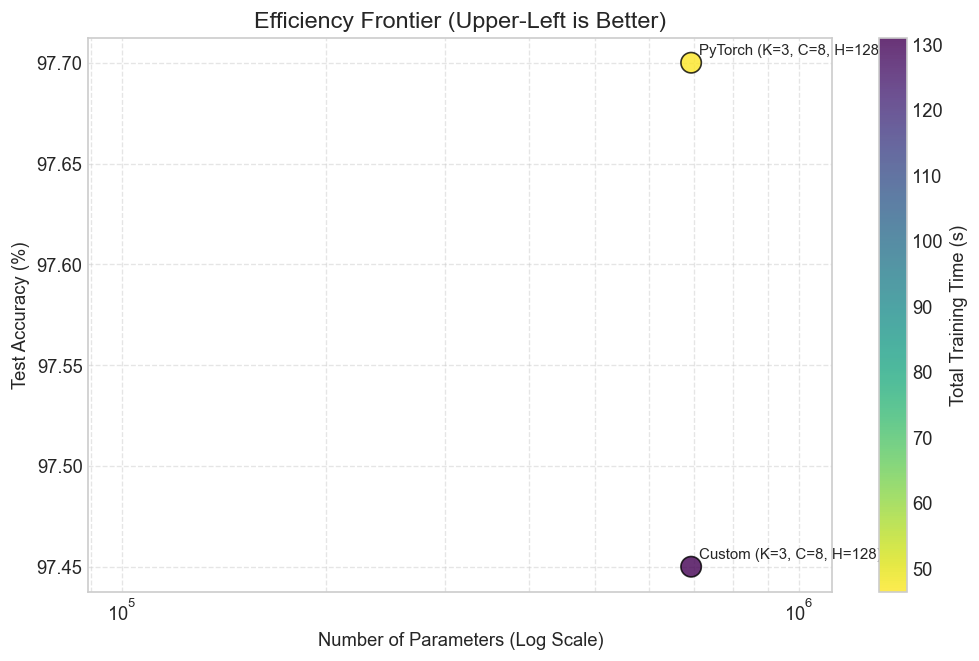


🧪 System Benchmark (Param count, time, memory)


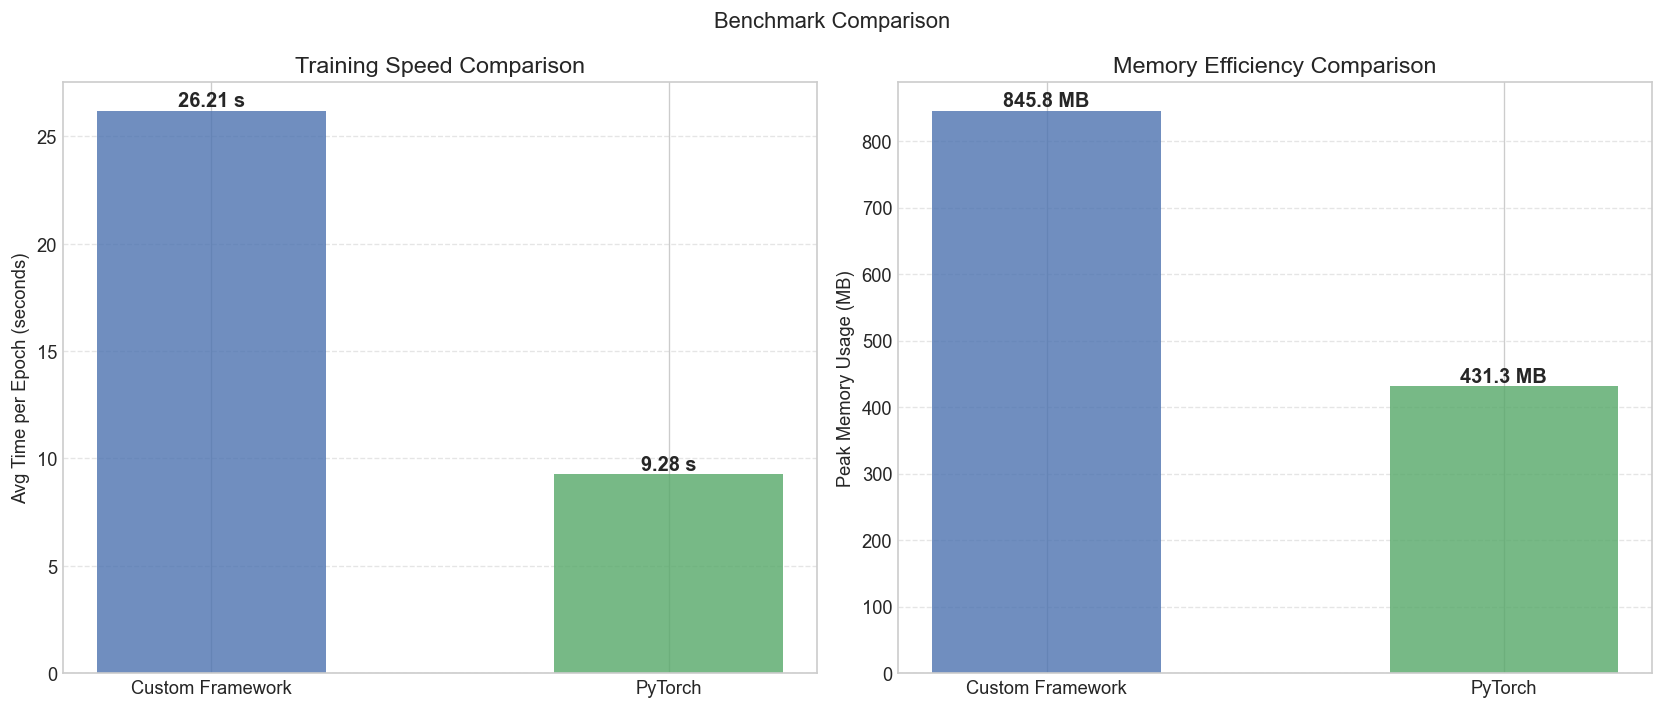

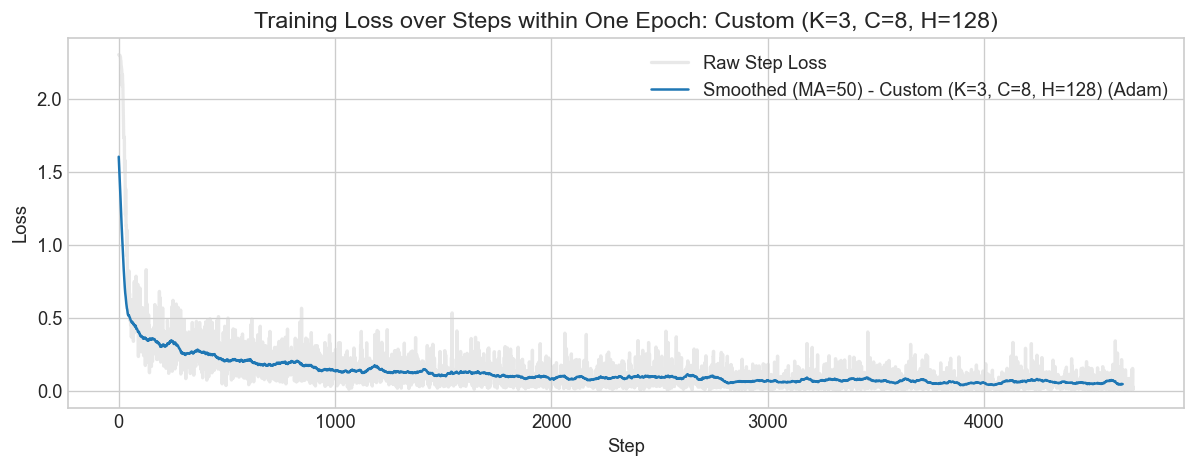

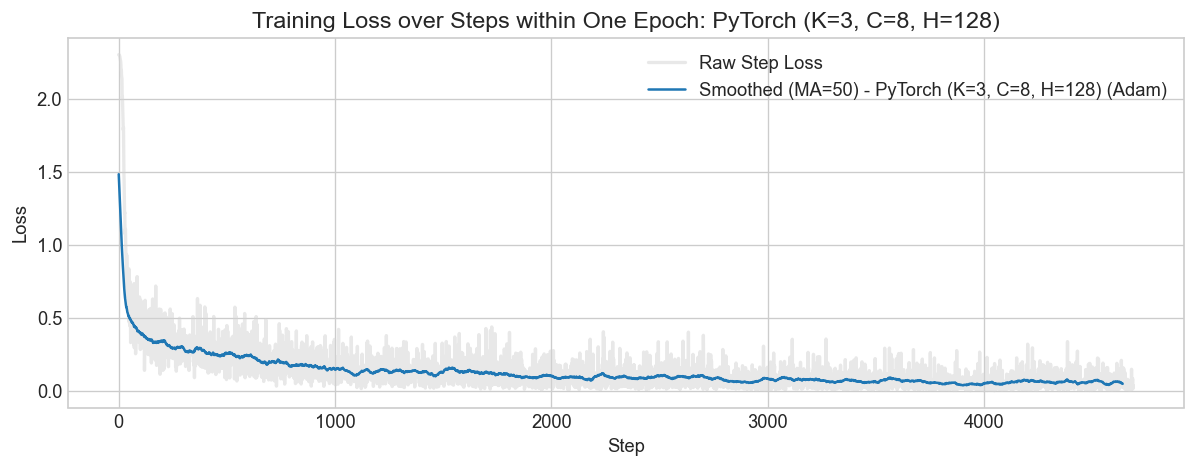

In [3]:
# === Visualize baseline pair: Custom vs Torch (Adam) ===

visualize_pair(custom_log_adam, torch_log_adam)
visuals.plot_detailed_loss(custom_log_adam, window=50)
visuals.plot_detailed_loss(torch_log_adam, window=50)

## 3. Optimizer Comparison: SGD vs Adam

>>> Running Custom framework with SGD ...
[INFO] Training Start | Optimizer: SGD | Epochs: 5
[INFO] Training log saved to: logs/CNN_k3_c8_h128_SGD_lr0.001_k3_c8_h128_SGD_lr0.001_20251212_230535.json
Custom log saved at: logs/CNN_k3_c8_h128_SGD_lr0.001_k3_c8_h128_SGD_lr0.001_20251212_230535.json
>>> Running Custom framework with Adam ...
[INFO] Training Start | Optimizer: Adam | Epochs: 5
[INFO] Training log saved to: logs/CNN_k3_c8_h128_Adam_lr0.001_k3_c8_h128_Adam_lr0.001_20251212_230706.json
Custom log saved at: logs/CNN_k3_c8_h128_Adam_lr0.001_k3_c8_h128_Adam_lr0.001_20251212_230706.json
>>> Running PyTorch baseline with SGD ...
[INFO-TORCH] Training Start | Opt: SGD | Device: cpu
Training log saved to: logs/TorchCNN_k3_c8_h128_SGD_lr0.001_k3_c8_h128_SGD_lr0.001_20251212_230904.json
Torch log saved at: logs/TorchCNN_k3_c8_h128_SGD_lr0.001_k3_c8_h128_SGD_lr0.001_20251212_230904.json
>>> Running PyTorch baseline with Adam ...
[INFO-TORCH] Training Start | Opt: Adam | Device: cpu
Train

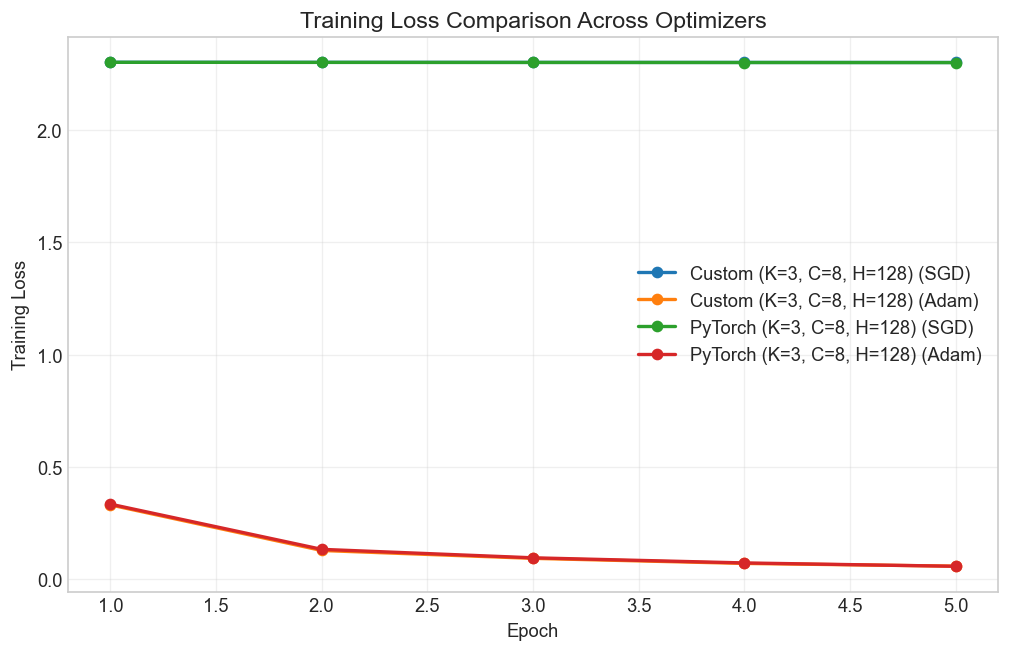

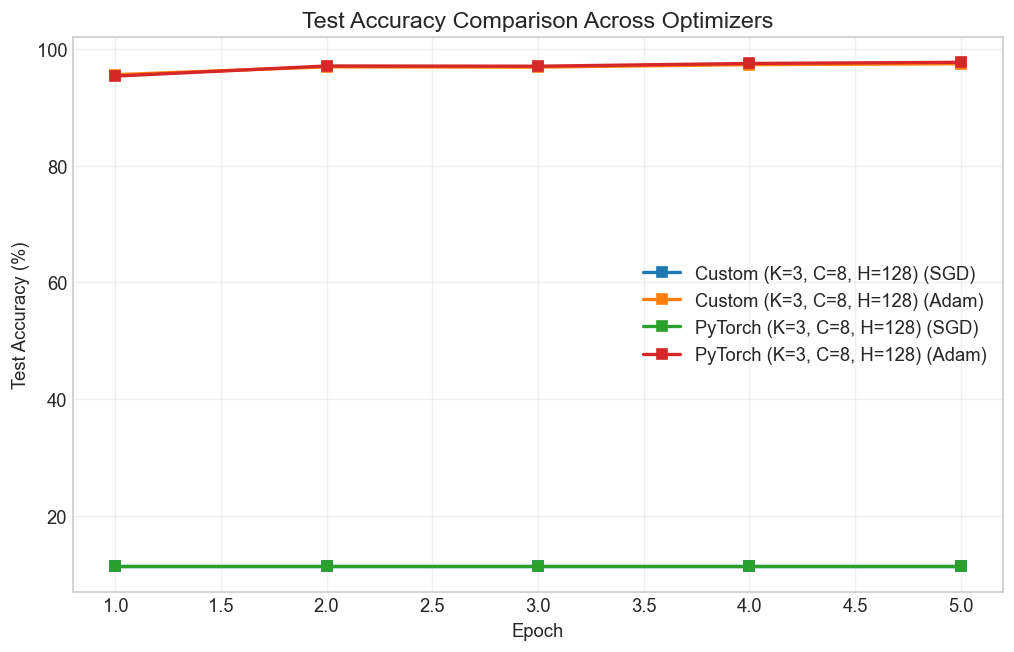

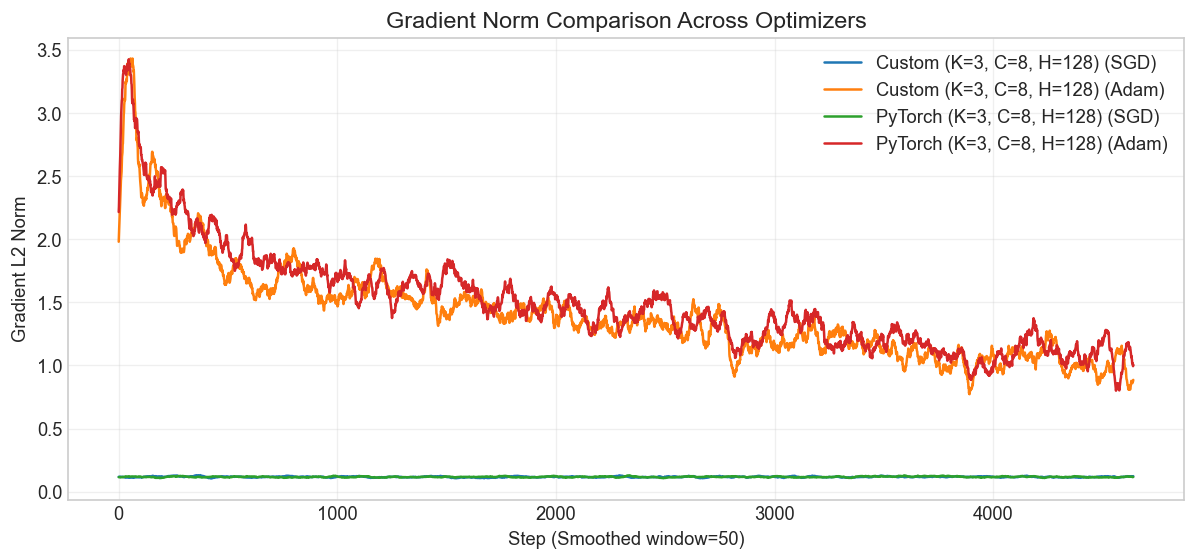

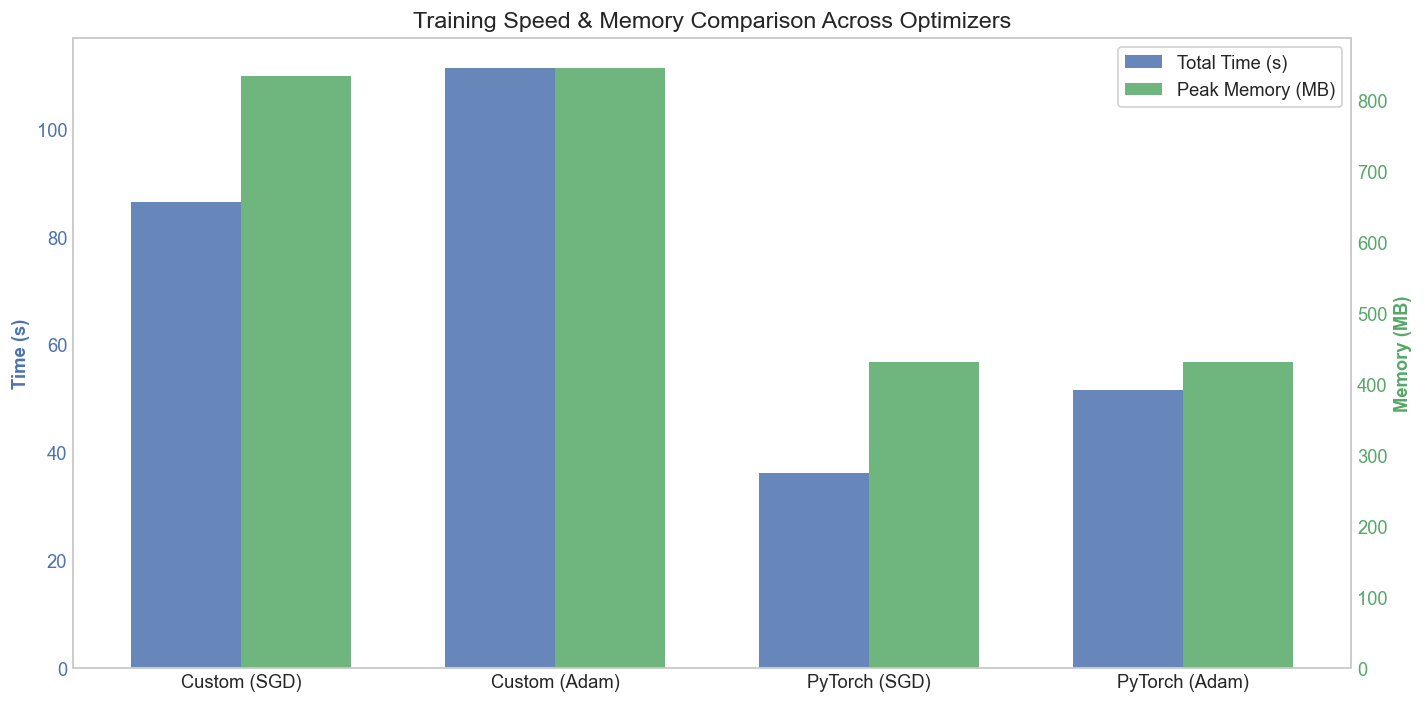

In [2]:
# === Run 2x2 optimizer grid: [Custom, Torch] x [SGD, Adam] ===

grid_cfg = ExperimentConfig(
    num_epochs=5,
    batch_size=64,
    lr=1e-3,
    model_out_channels=8,
    model_kernel_size=3,
    model_hidden_dim=128,
    log_path=str(LOG_DIR),
)

logs_grid = run_optimizer_grid(grid_cfg)

# === Visualize optimizer x framework grid ===

visualize_optimizer_grid(logs_grid)

## 4. Detailed Diagnostics for Selected Runs


🔍 Detailed Training Dynamics for Custom (Adam)


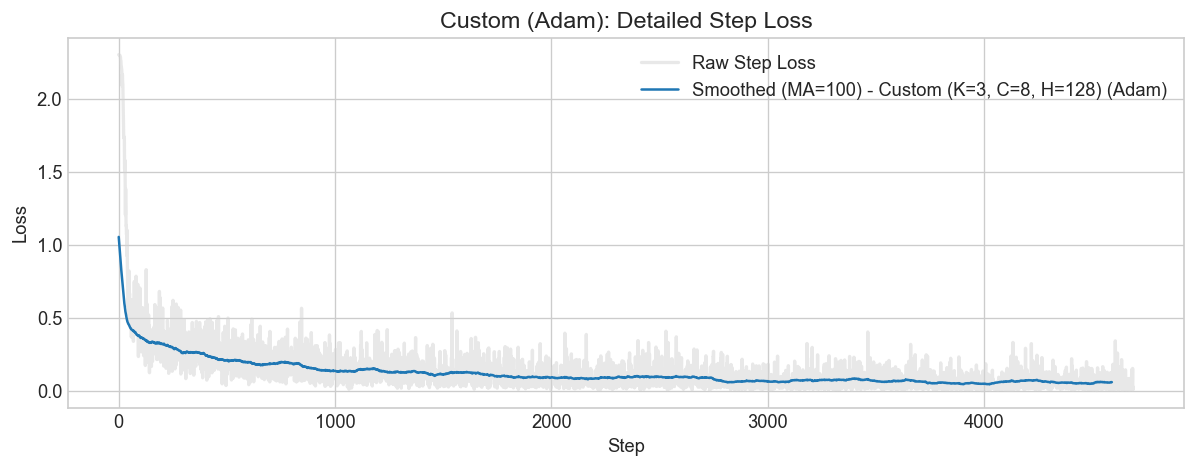


📉 Gradient Norm Stability for Custom (Adam)


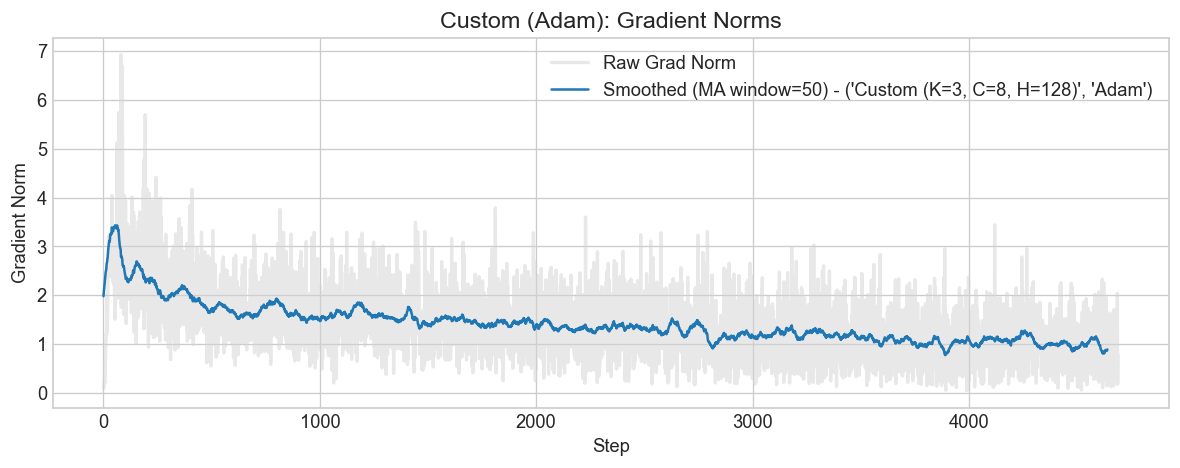


📊 Confusion Matrix for Custom (Adam)


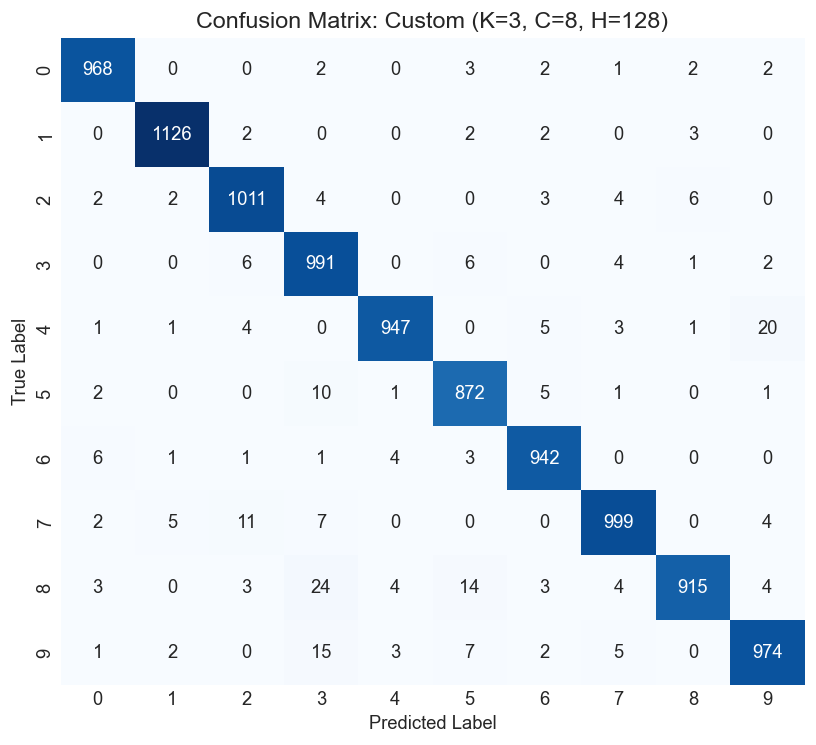


🔍 Detailed Training Dynamics for Custom (SGD)


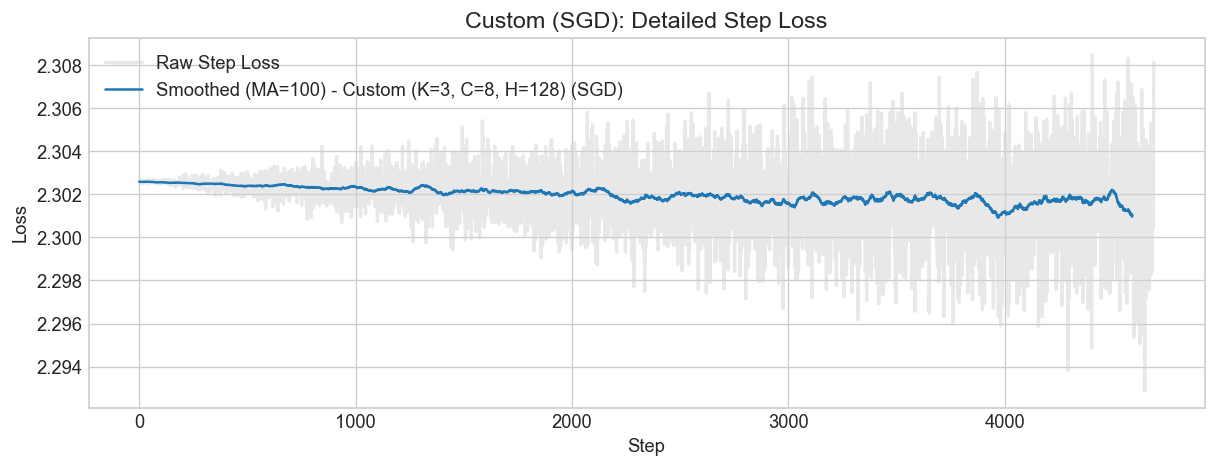


📉 Gradient Norm Stability for Custom (SGD)


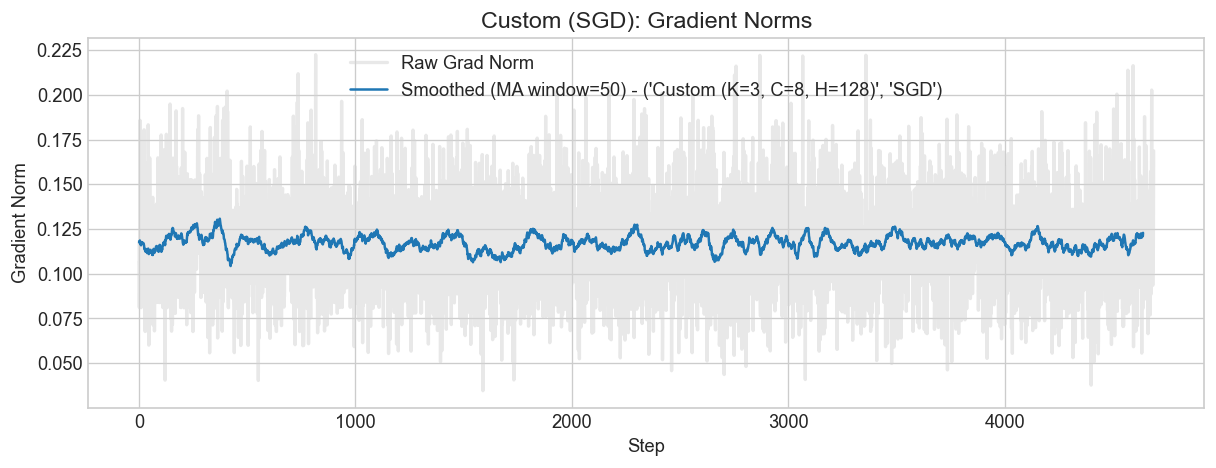


📊 Confusion Matrix for Custom (SGD)


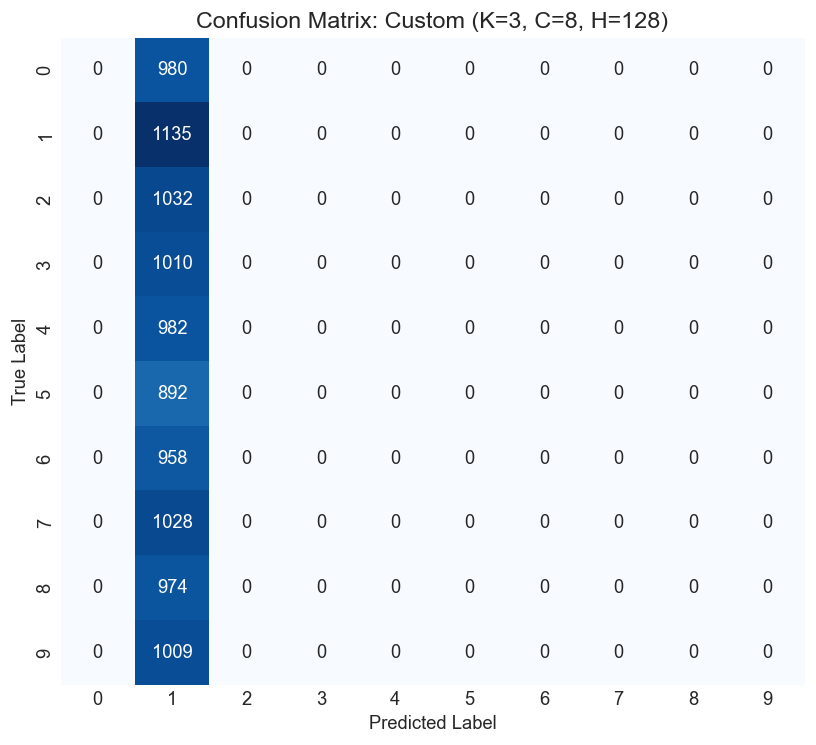


🔍 Detailed Training Dynamics for PyTorch (Adam)


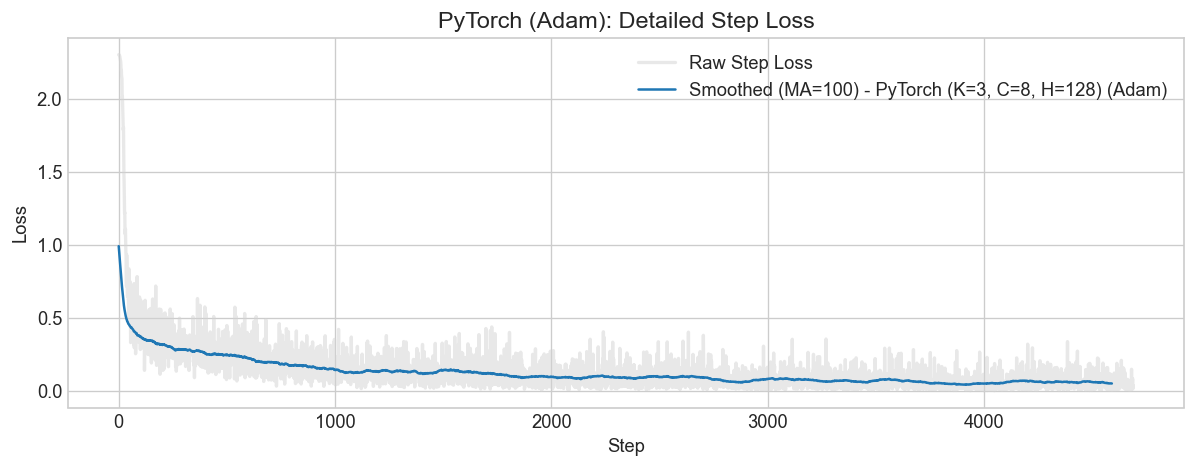


📉 Gradient Norm Stability for PyTorch (Adam)


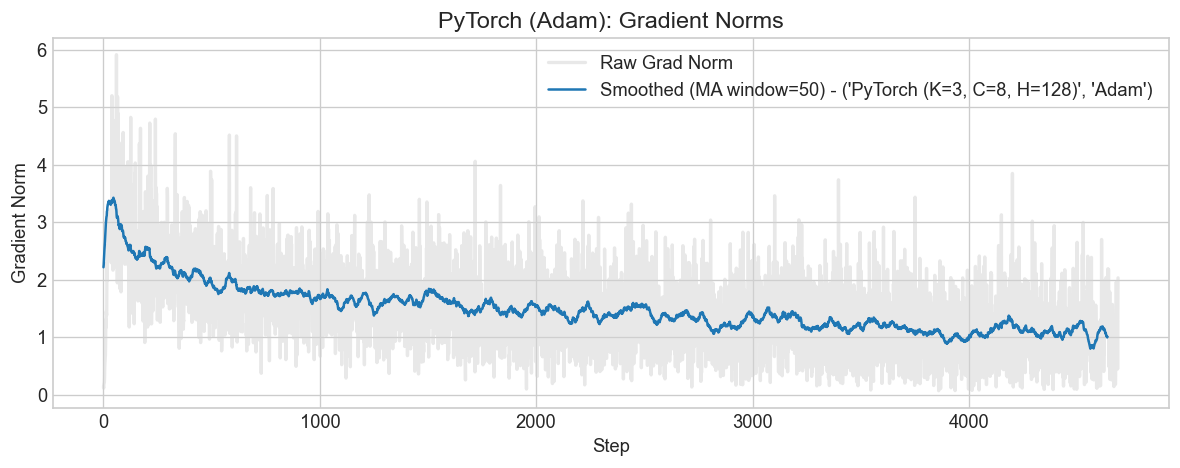


📊 Confusion Matrix for PyTorch (Adam)


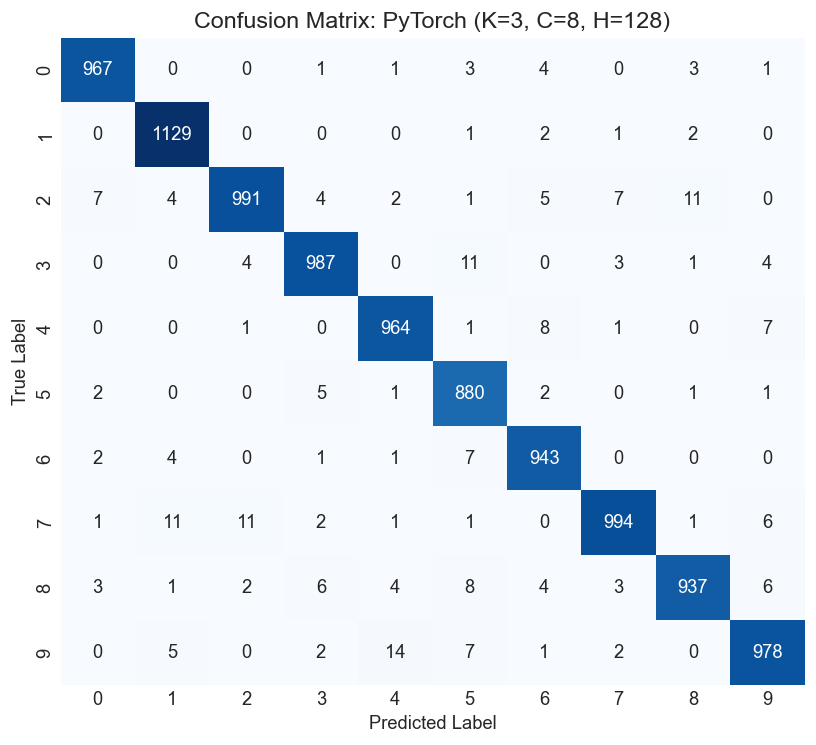


🔍 Detailed Training Dynamics for PyTorch (SGD)


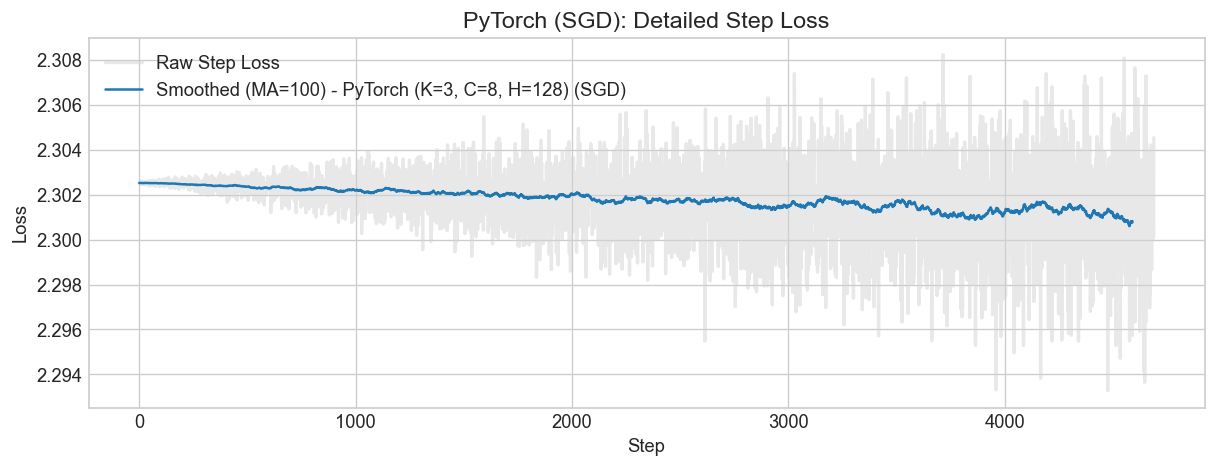


📉 Gradient Norm Stability for PyTorch (SGD)


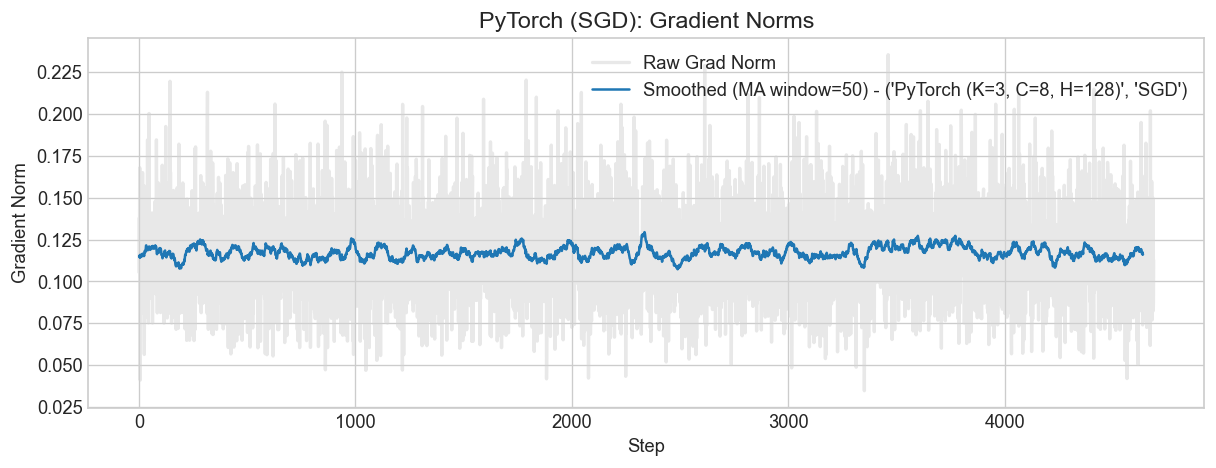


📊 Confusion Matrix for PyTorch (SGD)


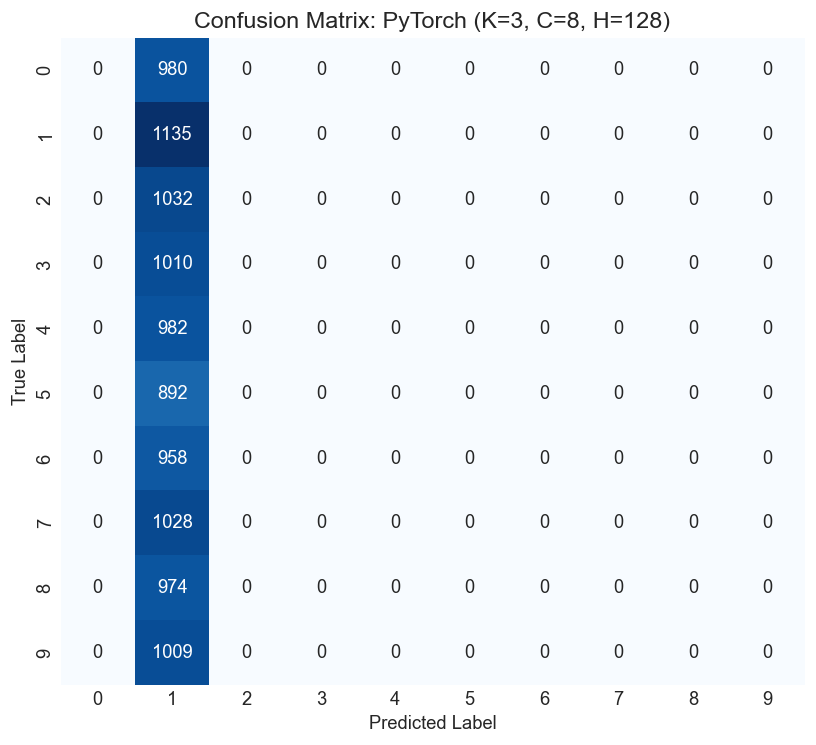

In [3]:
# === Optional: detailed diagnostics for a single run ===

visualize_diagnostics(logs_grid["custom_adam"], title_prefix="Custom (Adam)")
visualize_diagnostics(logs_grid["custom_sgd"], title_prefix="Custom (SGD)")
visualize_diagnostics(logs_grid["torch_adam"], title_prefix="PyTorch (Adam)")
visualize_diagnostics(logs_grid["torch_sgd"], title_prefix="PyTorch (SGD)")